In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import io
import dataframe_image as dfi
import seaborn as sns

In [13]:
from pathlib import Path

In [21]:
# Define paths
DATA_PATH = Path("../../data/raw")

In [22]:
# Load data
df = pd.read_excel(DATA_PATH / "2020_Birth_Final.xlsx")


In [18]:
# Quick exploration
df.info()
df.describe()

NameError: name 'df' is not defined

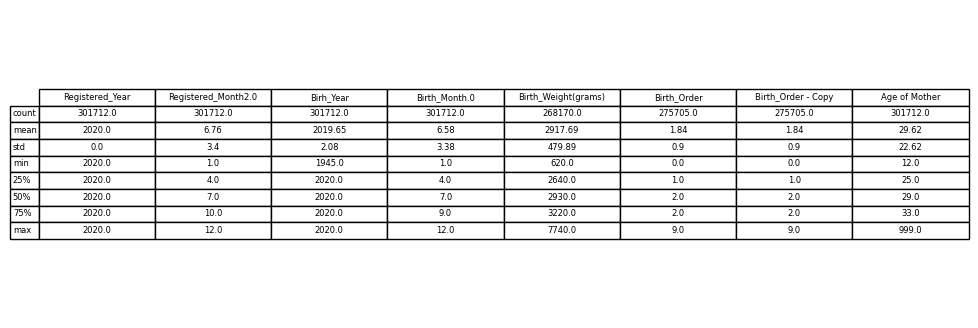

In [11]:
# For df.describe()
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table_data = df.describe().round(2)
tbl = table(ax, table_data, loc='center', cellLoc='center')
plt.savefig('describe_output.png', dpi=300, bbox_inches='tight')
plt.show()


📊 Creating missing values table...


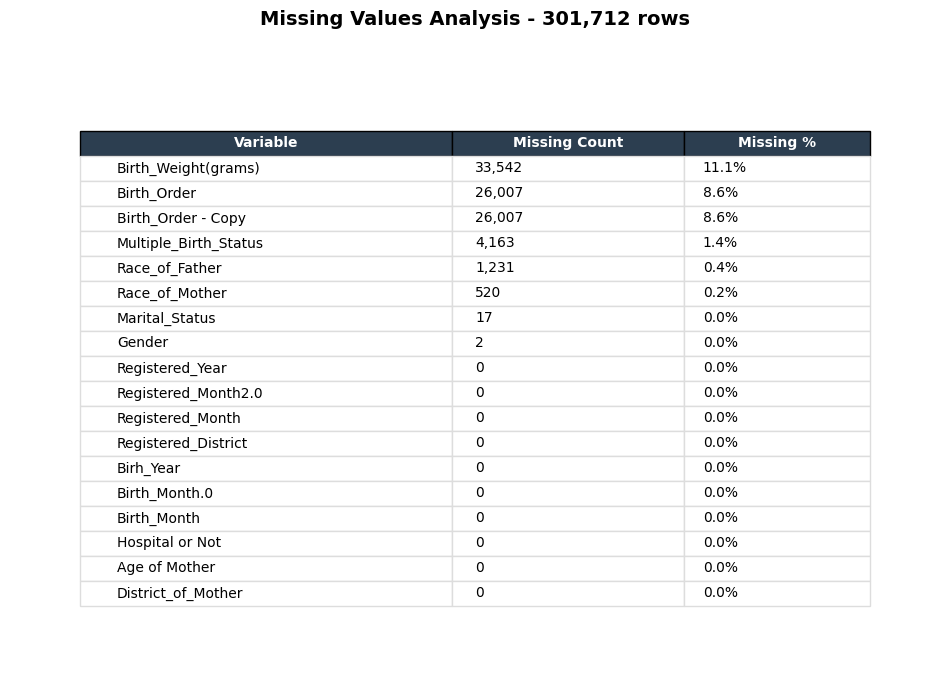

✅ Saved: missing_values.png


In [13]:

# Create missing values table
print("📊 Creating missing values table...")

# Prepare data
missing_data = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_data.append([col, f"{missing_count:,}", f"{missing_percent:.1f}%"])

# Sort by missing count (descending)
missing_data.sort(key=lambda x: int(x[1].replace(',', '')), reverse=True)

# Add header
table_data = [['Variable', 'Missing Count', 'Missing %']] + missing_data

# Create figure
fig, ax = plt.subplots(figsize=(12, len(missing_data) * 0.4 + 1))
ax.axis('off')
ax.axis('tight')

# Create table
tbl = ax.table(cellText=table_data[1:],
               colLabels=table_data[0],
               cellLoc='left',
               loc='center',
               colWidths=[0.4, 0.25, 0.2])

# Style
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

# Header style
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_edgecolor('#dddddd')

plt.title(f'Missing Values Analysis - {len(df):,} rows', 
          fontsize=14, fontweight='bold', pad=20)
plt.savefig('missing_values.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: missing_values.png")

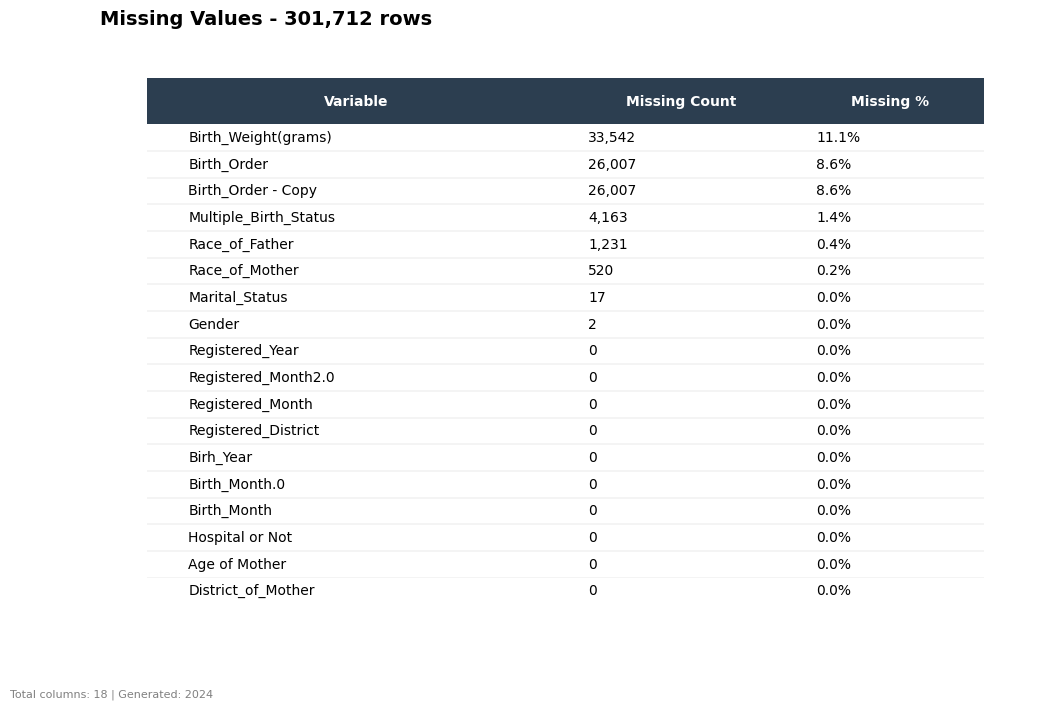

✅ Saved: missing_values_clean.png


In [14]:


# Prepare data
missing_data = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_data.append([col, f"{missing_count:,}", f"{missing_percent:.1f}%"])

# Sort by missing count
missing_data.sort(key=lambda x: int(x[1].replace(',', '')), reverse=True)

# Create figure
fig, ax = plt.subplots(figsize=(12, len(missing_data) * 0.35 + 1.2))
ax.axis('off')

# Create table
tbl = ax.table(cellText=missing_data,
               colLabels=['Variable', 'Missing Count', 'Missing %'],
               cellLoc='left',
               loc='center',
               colWidths=[0.45, 0.25, 0.2])

# Style - CLEAN horizontal lines only
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.6)

for (row, col), cell in tbl.get_celld().items():
    cell.set_linewidth(0)  # Remove all borders
    cell.set_edgecolor('white')
    
    if row == 0:  # Header
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(weight='bold', color='white')
        cell.set_height(0.08)
    else:  # Data rows
        cell.set_facecolor('white')
        cell.set_text_props(color='black')
        
        # Add subtle horizontal line below each row
        if row < len(missing_data):  # All rows except last
            cell.set_edgecolor('#cccccc')
            cell.set_linewidth(0.3)
            cell.visible_edges = 'B'  # Bottom edge only

plt.title(f'Missing Values - {len(df):,} rows', 
          fontsize=14, fontweight='bold', pad=20, loc='left')

# Add small footer
plt.figtext(0.05, 0.02, f'Total columns: {len(df.columns)} | Generated: 2024', 
            fontsize=8, color='gray')

plt.savefig('missing_values_clean.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white',
            pad_inches=0.3)
plt.show()

print("✅ Saved: missing_values_clean.png")

In [15]:


# Create missing values table
missing_data = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_data.append({
        'Variable': col,
        'Missing Count': missing_count,
        'Missing %': round(missing_percent, 1),
        'Data Type': str(df[col].dtype),
        'Unique Values': df[col].nunique()
    })

missing_df = pd.DataFrame(missing_data)
missing_df = missing_df.sort_values('Missing Count', ascending=False)

# Save to Excel with formatting
with pd.ExcelWriter('01_missing_values.xlsx', engine='openpyxl') as writer:
    missing_df.to_excel(writer, sheet_name='Missing Values', index=False)
    
    # Auto-fit columns
    worksheet = writer.sheets['Missing Values']
    for column in worksheet.columns:
        max_length = 0
        column_letter = column[0].column_letter
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = min(max_length + 2, 50)
        worksheet.column_dimensions[column_letter].width = adjusted_width

print("✅ Saved: 01_missing_values.xlsx")

✅ Saved: 01_missing_values.xlsx


In [16]:


def analyze_variable(df, column_name):
    """
    Complete analysis of a single variable
    Detects if qualitative or quantitative automatically
    """
    
    print(f"\n{'='*60}")
    print(f"📊 ANALYZING VARIABLE: '{column_name}'")
    print(f"{'='*60}")
    
    # Get data
    data = df[column_name]
    
    # Basic Info
    print(f"\n📌 BASIC INFORMATION:")
    print(f"   • Data Type: {data.dtype}")
    print(f"   • Total Values: {len(data):,}")
    print(f"   • Missing Values: {data.isnull().sum():,} ({(data.isnull().sum()/len(data)*100):.1f}%)")
    print(f"   • Unique Values: {data.nunique():,}")
    
    # Determine variable type
    if data.dtype in ['object', 'category', 'bool']:
        var_type = "QUALITATIVE (Categorical)"
    elif data.dtype in ['int64', 'float64']:
        if data.nunique() < 20:  # Few unique values = categorical numeric
            var_type = "QUALITATIVE (Numeric Categorical)"
        else:
            var_type = "QUANTITATIVE (Continuous)"
    elif 'datetime' in str(data.dtype):
        var_type = "DATE/TIME"
    else:
        var_type = f"OTHER ({data.dtype})"
    
    print(f"   • Variable Type: {var_type}")
    
    # Create analysis based on type
    if 'QUALITATIVE' in var_type or var_type == "DATE/TIME":
        analyze_qualitative(data, column_name)
    elif 'QUANTITATIVE' in var_type:
        analyze_quantitative(data, column_name)
    
    return var_type

def analyze_qualitative(data, column_name):
    """Analyze qualitative/categorical variables"""
    
    print(f"\n📊 QUALITATIVE ANALYSIS:")
    
    # Drop missing for analysis
    data_clean = data.dropna()
    
    # Frequency table
    freq = data_clean.value_counts()
    freq_pct = (data_clean.value_counts(normalize=True) * 100).round(1)
    
    # Create summary dataframe
    summary_df = pd.DataFrame({
        'Category': freq.index,
        'Count': freq.values,
        'Percentage': freq_pct.values
    })
    
    print(f"\n📋 TOP 10 CATEGORIES:")
    print(summary_df.head(10).to_string(index=False))
    
    # Check for many categories
    if len(freq) > 20:
        print(f"\n⚠️  Warning: {len(freq)} unique categories - too many to visualize all")
        print(f"   Showing top 20, others grouped as 'Other'")
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot (top 15)
    top_n = min(15, len(freq))
    top_cats = freq.head(top_n)
    
    axes[0].barh(range(top_n), top_cats.values)
    axes[0].set_yticks(range(top_n))
    axes[0].set_yticklabels([str(x)[:20] + '...' if len(str(x)) > 20 else str(x) 
                             for x in top_cats.index])
    axes[0].set_xlabel('Count')
    axes[0].set_title(f'Top {top_n} Categories - {column_name}')
    axes[0].invert_yaxis()
    
    # Pie chart (top 5 + others)
    if len(freq) > 5:
        top5 = freq.head(5)
        others = pd.Series([freq[5:].sum()], index=['Others'])
        pie_data = pd.concat([top5, others])
    else:
        pie_data = freq
    
    axes[1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', 
                startangle=90, textprops={'fontsize': 9})
    axes[1].set_title('Distribution')
    
    plt.suptitle(f'Qualitative Analysis: {column_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'analysis_{column_name}_qualitative.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save detailed table
    summary_df.to_csv(f'{column_name}_categories.csv', index=False)
    print(f"\n💾 Saved: {column_name}_categories.csv")

def analyze_quantitative(data, column_name):
    """Analyze quantitative/numeric variables"""
    
    print(f"\n📊 QUANTITATIVE ANALYSIS:")
    
    # Drop missing for analysis
    data_clean = data.dropna()
    
    # Statistics
    stats = data_clean.describe(percentiles=[.1, .25, .5, .75, .9]).round(2)
    
    print(f"\n📋 STATISTICS:")
    print(f"   • Mean: {stats['mean']:.2f}")
    print(f"   • Median: {stats['50%']:.2f}")
    print(f"   • Std Dev: {stats['std']:.2f}")
    print(f"   • Min: {stats['min']:.2f}")
    print(f"   • Max: {stats['max']:.2f}")
    print(f"   • Range: {stats['max'] - stats['min']:.2f}")
    print(f"   • Q1 (25%): {stats['25%']:.2f}")
    print(f"   • Q3 (75%): {stats['75%']:.2f}")
    print(f"   • IQR: {stats['75%'] - stats['25%']:.2f}")
    
    # Check for outliers
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    
    print(f"\n📌 OUTLIERS:")
    print(f"   • Lower bound: {lower_bound:.2f}")
    print(f"   • Upper bound: {upper_bound:.2f}")
    print(f"   • Outliers count: {len(outliers)} ({len(outliers)/len(data_clean)*100:.1f}%)")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram
    axes[0, 0].hist(data_clean, bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(stats['mean'], color='red', linestyle='--', label=f"Mean: {stats['mean']:.2f}")
    axes[0, 0].axvline(stats['50%'], color='green', linestyle='--', label=f"Median: {stats['50%']:.2f}")
    axes[0, 0].set_xlabel(column_name)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution (Histogram)')
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(data_clean, vert=False)
    axes[0, 1].set_xlabel(column_name)
    axes[0, 1].set_title('Box Plot (shows outliers)')
    
    # Density plot
    axes[1, 0].hist(data_clean, bins=30, density=True, alpha=0.7, edgecolor='black')
    data_clean.plot.kde(ax=axes[1, 0], color='red', linewidth=2)
    axes[1, 0].set_xlabel(column_name)
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title('Distribution with Density Curve')
    
    # Cumulative distribution
    axes[1, 1].hist(data_clean, bins=30, cumulative=True, density=True, 
                    alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel(column_name)
    axes[1, 1].set_ylabel('Cumulative Probability')
    axes[1, 1].set_title('Cumulative Distribution')
    axes[1, 1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Median')
    axes[1, 1].axhline(y=0.25, color='orange', linestyle='--', alpha=0.5, label='Q1')
    axes[1, 1].axhline(y=0.75, color='orange', linestyle='--', alpha=0.5, label='Q3')
    axes[1, 1].legend()
    
    plt.suptitle(f'Quantitative Analysis: {column_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'analysis_{column_name}_quantitative.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save statistics
    stats_df = pd.DataFrame({
        'Statistic': ['count', 'mean', 'std', 'min', '10%', '25%', '50%', '75%', '90%', 'max', 'IQR'],
        'Value': [
            stats['count'], stats['mean'], stats['std'], stats['min'],
            stats['10%'], stats['25%'], stats['50%'], stats['75%'], stats['90%'],
            stats['max'], stats['75%'] - stats['25%']
        ]
    })
    stats_df.to_csv(f'{column_name}_statistics.csv', index=False)
    print(f"\n💾 Saved: {column_name}_statistics.csv")

# === ANALYZE SPECIFIC VARIABLES ===

# Example 1: Analyze one variable by name
variable_name = 'birth_weight'  # Change this to your column name
if variable_name in df.columns:
    var_type = analyze_variable(df, variable_name)
else:
    print(f"❌ Column '{variable_name}' not found!")
    print(f"Available columns: {list(df.columns)[:10]}...")

# Example 2: Analyze multiple important variables
important_vars = ['mother_age', 'birth_weight', 'gestation_weeks', 'hospital_type']  # Adjust as needed

for var in important_vars:
    if var in df.columns:
        analyze_variable(df, var)
    else:
        print(f"\n⚠️  Column '{var}' not found")

# Example 3: Auto-detect and analyze all variables (but be selective)
print("\n" + "="*60)
print("📋 DATASET VARIABLES SUMMARY")
print("="*60)

for col in df.columns[:10]:  # First 10 columns
    dtype = df[col].dtype
    missing = df[col].isnull().sum()
    unique = df[col].nunique()
    
    if dtype in ['object', 'category']:
        type_label = "📝 QUALITATIVE"
    elif dtype in ['int64', 'float64']:
        if unique < 20:
            type_label = "🔢 QUALITATIVE (numeric code)"
        else:
            type_label = "📈 QUANTITATIVE"
    else:
        type_label = f"❓ {dtype}"
    
    print(f"{type_label:30} | {col:25} | Missing: {missing:6,} | Unique: {unique:6,}")

❌ Column 'birth_weight' not found!
Available columns: ['Registered_Year', 'Registered_Month2.0', 'Registered_Month', 'Registered_District', 'Birh_Year', 'Birth_Month.0', 'Birth_Month', 'Gender', 'Hospital or Not', 'Multiple_Birth_Status']...

⚠️  Column 'mother_age' not found

⚠️  Column 'birth_weight' not found

⚠️  Column 'gestation_weeks' not found

⚠️  Column 'hospital_type' not found

📋 DATASET VARIABLES SUMMARY
🔢 QUALITATIVE (numeric code)   | Registered_Year           | Missing:      0 | Unique:      1
🔢 QUALITATIVE (numeric code)   | Registered_Month2.0       | Missing:      0 | Unique:     12
❓ str                          | Registered_Month          | Missing:      0 | Unique:     12
❓ str                          | Registered_District       | Missing:      0 | Unique:     25
📈 QUANTITATIVE                 | Birh_Year                 | Missing:      0 | Unique:     63
🔢 QUALITATIVE (numeric code)   | Birth_Month.0             | Missing:      0 | Unique:     12
❓ str          

In [ ]:
# Using pandas built-in boxplot
df['mother_age'].dropna().plot.box(figsize=(8, 6))
plt.title('Boxplot of Mother\'s Age')
plt.ylabel('Age (years)')
plt.grid(True, alpha=0.3)
plt.savefig('boxplot_mother_age_pandas.png', dpi=300, bbox_inches='tight')
plt.show()


🔍 Analyzing column: Birth_Weight(grams)

📌 Basic Information:
   • Data Type: float64
   • Total: 301,712
   • Present: 268,170
   • Missing: 33,542 (11.1%)

📈 Statistics:
   • Mean: 2917.69
   • Median: 2930.00
   • Min: 620.00
   • Max: 7740.00


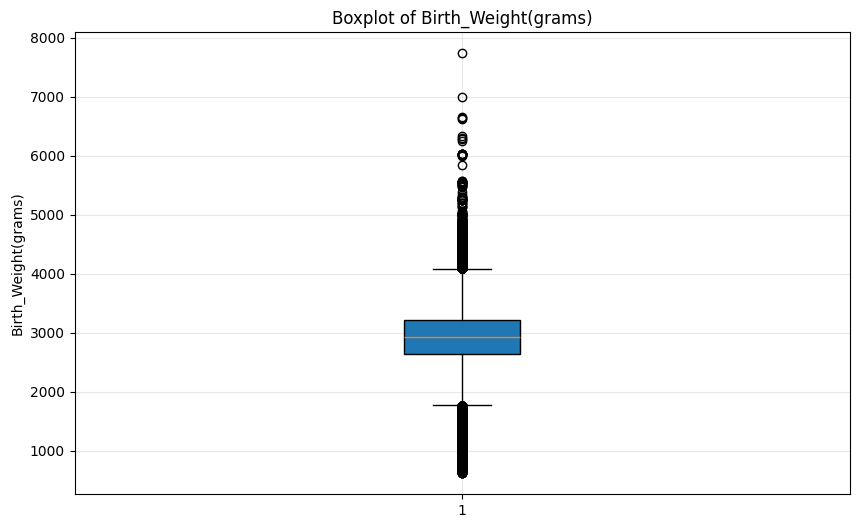

✅ Saved: boxplot_Birth_Weight(grams).png


In [18]:
COLUMN_NAME = 'Birth_Weight(grams)'  # Change this one line to analyze different columns

print(f"\n🔍 Analyzing column: {COLUMN_NAME}")
print("="*50)

# Now use COLUMN_NAME everywhere
data = df[COLUMN_NAME]

# Basic info
print(f"\n📌 Basic Information:")
print(f"   • Data Type: {data.dtype}")
print(f"   • Total: {len(data):,}")
print(f"   • Present: {data.count():,}")
print(f"   • Missing: {data.isnull().sum():,} ({(data.isnull().sum()/len(data)*100):.1f}%)")

# Analysis based on type
if data.dtype in ['int64', 'float64']:
    valid_data = data.dropna()
    if len(valid_data) > 0:
        print(f"\n📈 Statistics:")
        print(f"   • Mean: {valid_data.mean():.2f}")
        print(f"   • Median: {valid_data.median():.2f}")
        print(f"   • Min: {valid_data.min():.2f}")
        print(f"   • Max: {valid_data.max():.2f}")
        
        # Create boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(valid_data, patch_artist=True)
        plt.title(f'Boxplot of {COLUMN_NAME}')
        plt.ylabel(COLUMN_NAME)
        plt.grid(True, alpha=0.3)
        plt.savefig(f'boxplot_{COLUMN_NAME}.png', dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ Saved: boxplot_{COLUMN_NAME}.png")
else:
    print(f"\n📋 Categories:")
    print(data.value_counts().head(10).to_string())

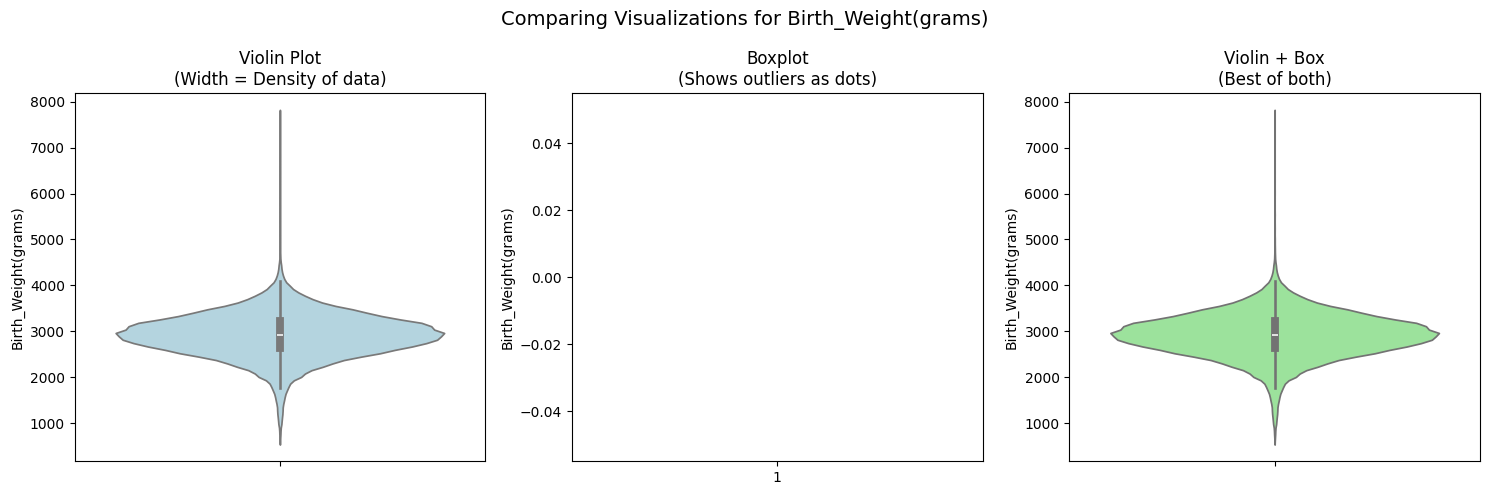

In [23]:

COLUMN = 'Birth_Weight(grams)'  # Change this
data = df[COLUMN]#.dropna()

# Violin Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Violin plot
sns.violinplot(y=data, ax=axes[0], color='lightblue')
axes[0].set_title('Violin Plot\n(Width = Density of data)')
axes[0].set_ylabel(COLUMN)

# Boxplot for comparison
axes[1].boxplot(data, patch_artist=True)
axes[1].set_title('Boxplot\n(Shows outliers as dots)')
axes[1].set_ylabel(COLUMN)

# Violin with box inside
sns.violinplot(y=data, ax=axes[2], color='lightgreen', inner='box')
axes[2].set_title('Violin + Box\n(Best of both)')
axes[2].set_ylabel(COLUMN)

plt.suptitle(f'Comparing Visualizations for {COLUMN}', fontsize=14)
plt.tight_layout()
plt.savefig(f'{COLUMN}_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

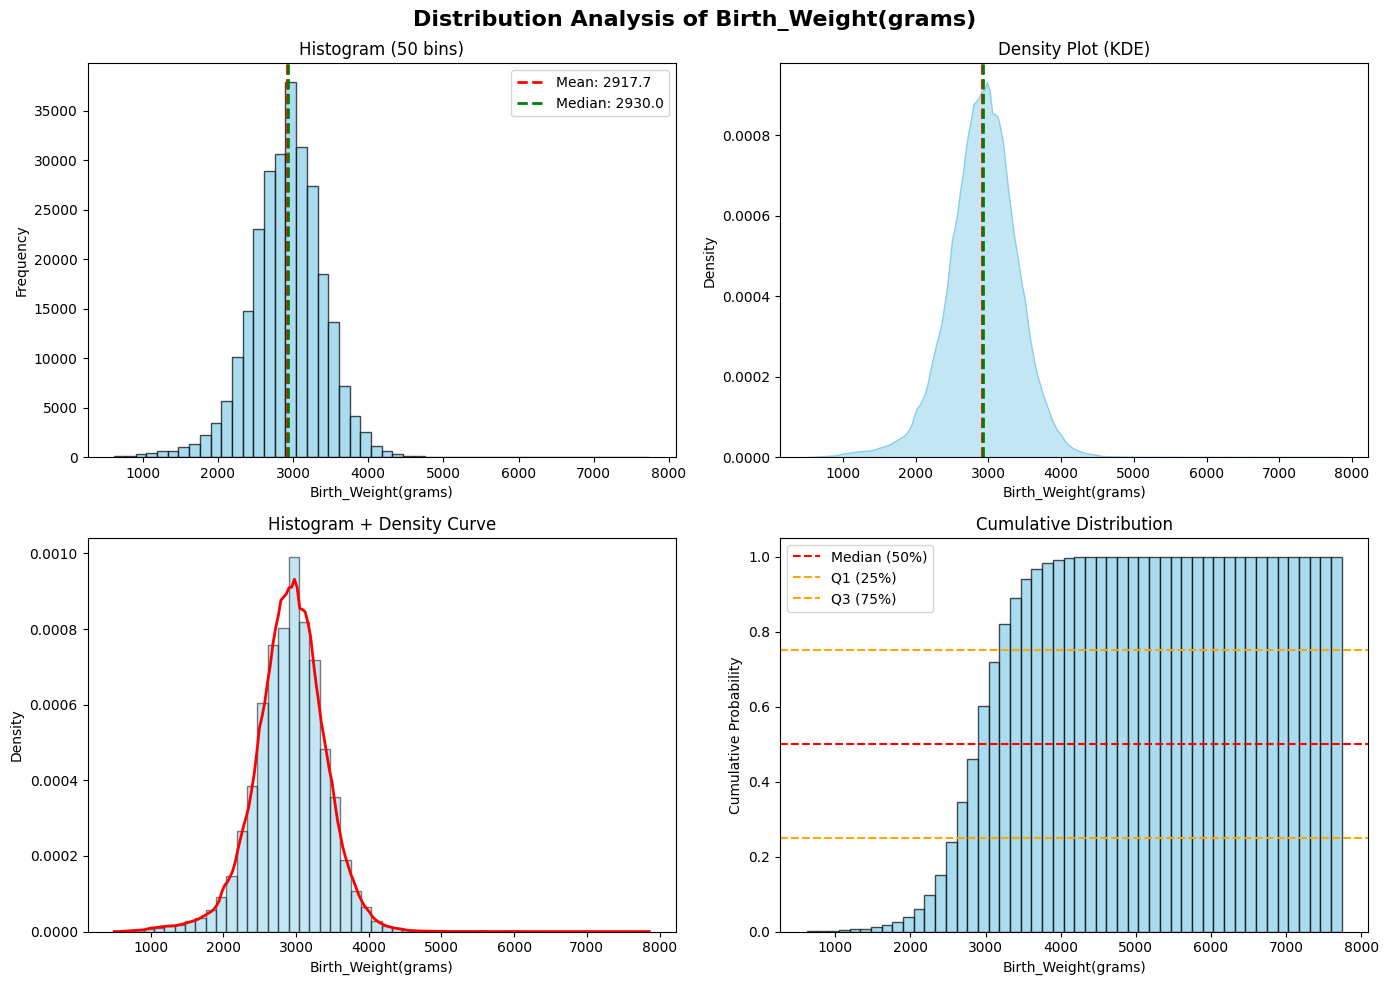


📊 Statistics:
  • Mean: 2917.69
  • Median: 2930.00
  • 95% of data: nan - nan


In [29]:

COLUMN = 'Birth_Weight(grams)'  # Change this
data = df[COLUMN]#.dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram
axes[0, 0].hist(data, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
axes[0, 0].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.1f}')
axes[0, 0].set_xlabel(COLUMN)
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram (50 bins)')
axes[0, 0].legend()

# 2. Density Plot (KDE)
sns.kdeplot(data, ax=axes[0, 1], fill=True, color='skyblue', alpha=0.5)
axes[0, 1].axvline(data.mean(), color='red', linestyle='--', linewidth=2)
axes[0, 1].axvline(data.median(), color='green', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(COLUMN)
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Density Plot (KDE)')

# 3. Histogram with KDE overlay
axes[1, 0].hist(data, bins=50, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sns.kdeplot(data, ax=axes[1, 0], color='red', linewidth=2)
axes[1, 0].set_xlabel(COLUMN)
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Histogram + Density Curve')

# 4. Cumulative Distribution
axes[1, 1].hist(data, bins=50, cumulative=True, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].axhline(y=0.5, color='red', linestyle='--', label='Median (50%)')
axes[1, 1].axhline(y=0.25, color='orange', linestyle='--', label='Q1 (25%)')
axes[1, 1].axhline(y=0.75, color='orange', linestyle='--', label='Q3 (75%)')
axes[1, 1].set_xlabel(COLUMN)
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].set_title('Cumulative Distribution')
axes[1, 1].legend()

plt.suptitle(f'Distribution Analysis of {COLUMN}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{COLUMN}_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Statistics:")
print(f"  • Mean: {data.mean():.2f}")
print(f"  • Median: {data.median():.2f}")
print(f"  • 95% of data: {np.percentile(data, 2.5):.2f} - {np.percentile(data, 97.5):.2f}")

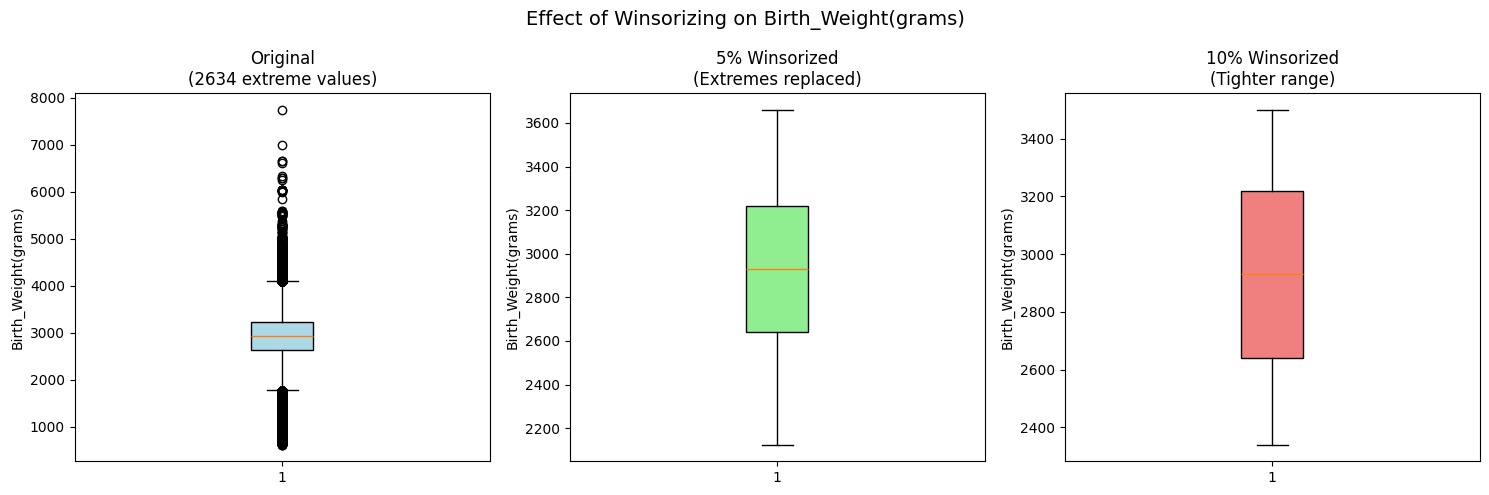

In [31]:
from scipy.stats import mstats

COLUMN = 'Birth_Weight(grams)'   # Change this
data = df[COLUMN].dropna()

# Winsorize at different levels
winsorized_5 = mstats.winsorize(data, limits=[0.05, 0.05])  # Cap 5% from each end
winsorized_10 = mstats.winsorize(data, limits=[0.10, 0.10])  # Cap 10% from each end

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original boxplot
axes[0].boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[0].set_title(f'Original\n({len(data[data > np.percentile(data, 99)])} extreme values)')
axes[0].set_ylabel(COLUMN)

# 5% Winsorized
axes[1].boxplot(winsorized_5, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title(f'5% Winsorized\n(Extremes replaced)')
axes[1].set_ylabel(COLUMN)

# 10% Winsorized
axes[2].boxplot(winsorized_10, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[2].set_title(f'10% Winsorized\n(Tighter range)')
axes[2].set_ylabel(COLUMN)

plt.suptitle(f'Effect of Winsorizing on {COLUMN}', fontsize=14)
plt.tight_layout()
plt.savefig(f'{COLUMN}_winsorized.png', dpi=300, bbox_inches='tight')
plt.show()

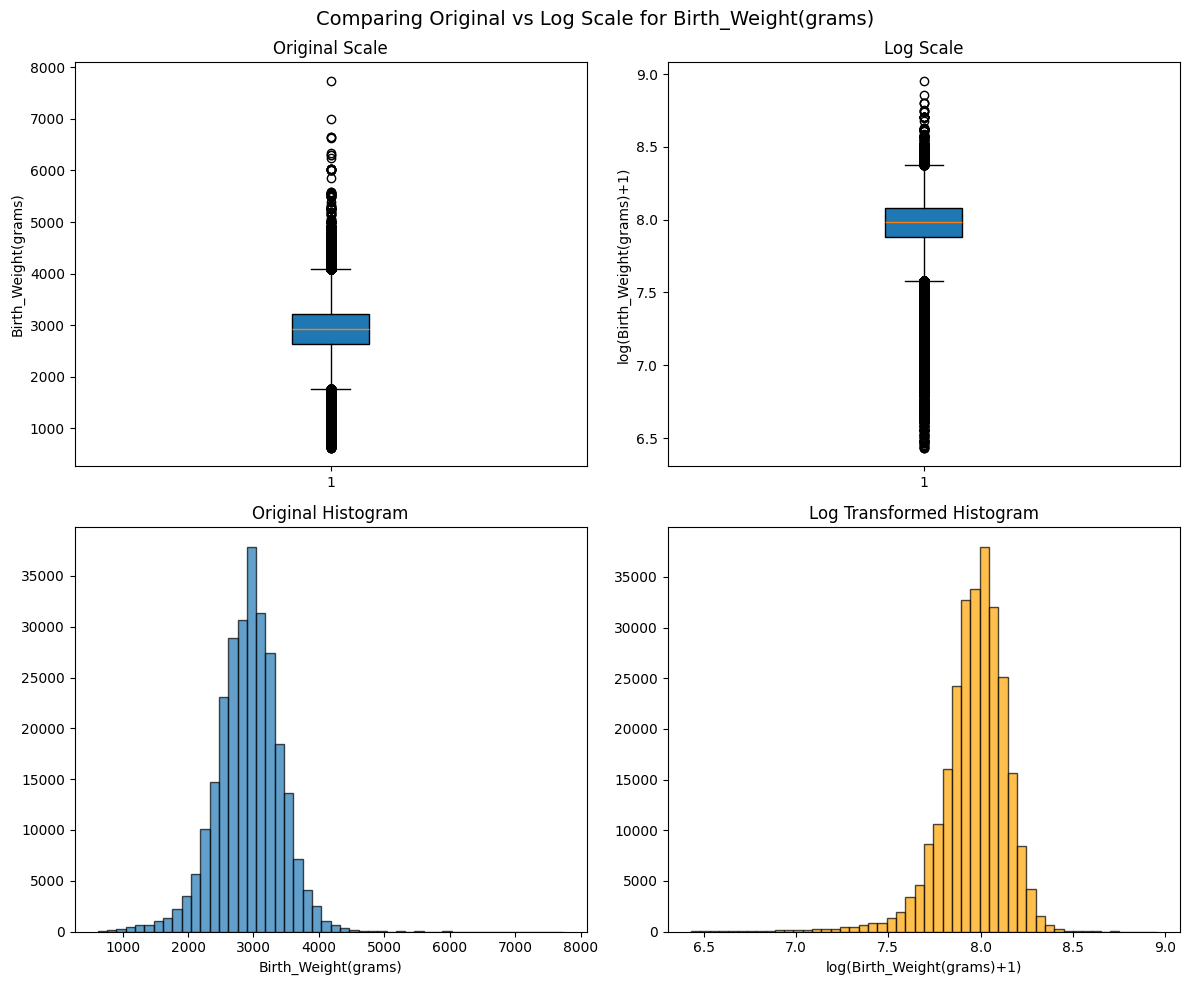

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


COLUMN = 'Birth_Weight(grams)'  # Change this
data = df[COLUMN].dropna()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original scale
axes[0, 0].boxplot(data, patch_artist=True)
axes[0, 0].set_title('Original Scale')
axes[0, 0].set_ylabel(COLUMN)

# Log scale
axes[0, 1].boxplot(np.log1p(data), patch_artist=True)  # log1p handles zeros
axes[0, 1].set_title('Log Scale')
axes[0, 1].set_ylabel(f'log({COLUMN}+1)')

# Original histogram
axes[1, 0].hist(data, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel(COLUMN)
axes[1, 0].set_title('Original Histogram')

# Log scale histogram
axes[1, 1].hist(np.log1p(data), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_xlabel(f'log({COLUMN}+1)')
axes[1, 1].set_title('Log Transformed Histogram')

plt.suptitle(f'Comparing Original vs Log Scale for {COLUMN}', fontsize=14)
plt.tight_layout()
plt.savefig(f'{COLUMN}_logscale.png', dpi=300, bbox_inches='tight')
plt.show()

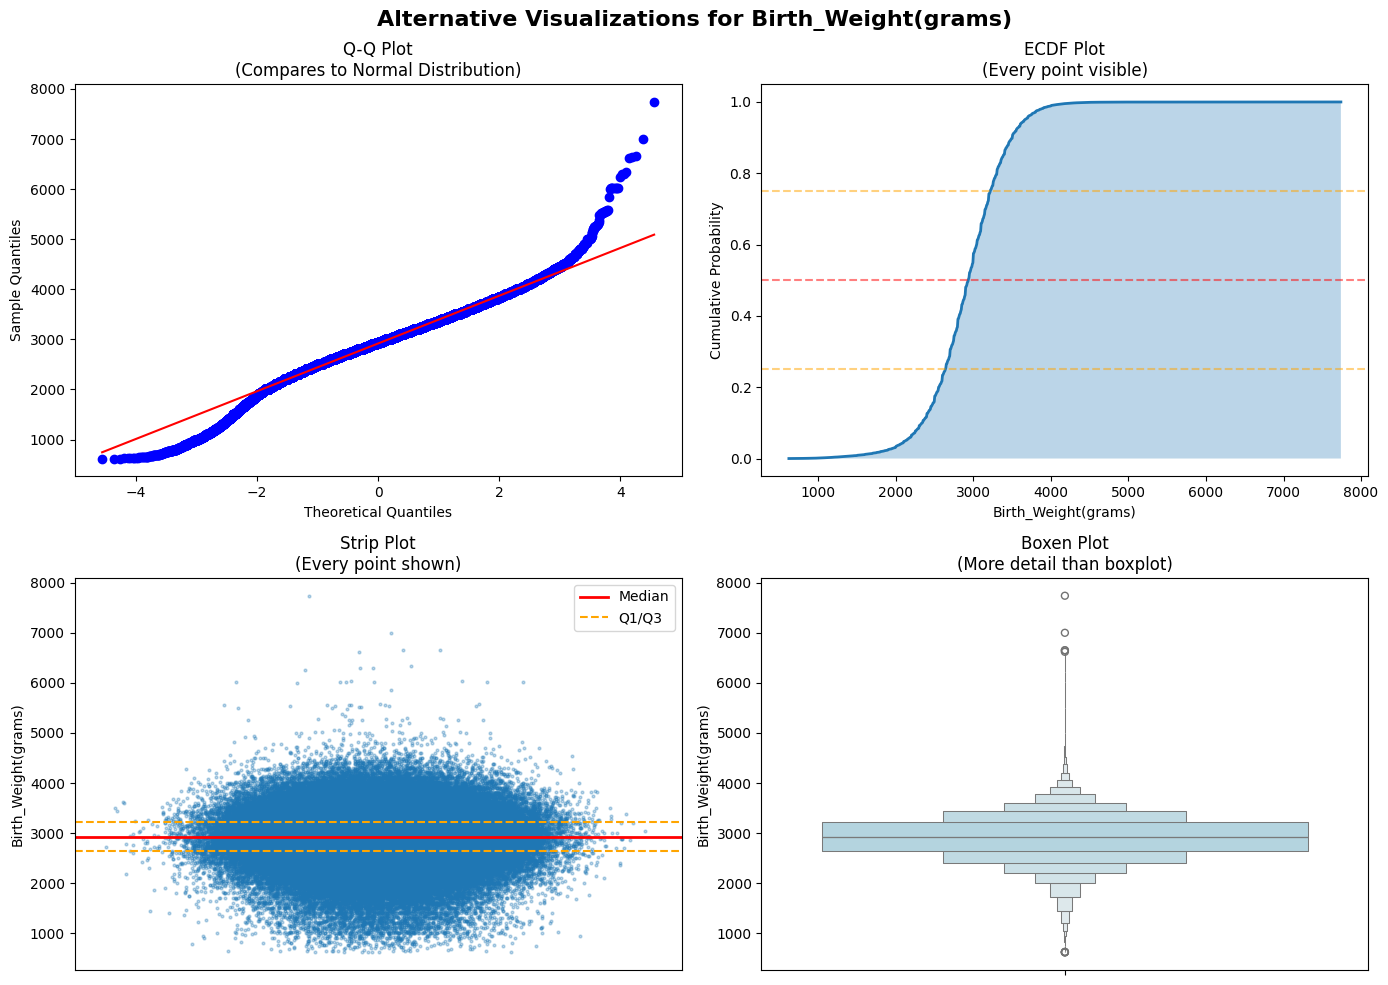

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

COLUMN = 'Birth_Weight(grams)'  # Change this
data = df[COLUMN].dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. QQ Plot (compare to normal distribution)
stats.probplot(data, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot\n(Compares to Normal Distribution)')
axes[0, 0].set_xlabel('Theoretical Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')

# 2. ECDF (Empirical Cumulative Distribution)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data)
x = np.linspace(data.min(), data.max(), 1000)
axes[0, 1].plot(x, ecdf(x), linewidth=2)
axes[0, 1].fill_between(x, 0, ecdf(x), alpha=0.3)
axes[0, 1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.25, color='orange', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.75, color='orange', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel(COLUMN)
axes[0, 1].set_ylabel('Cumulative Probability')
axes[0, 1].set_title('ECDF Plot\n(Every point visible)')

# 3. Strip Plot (all points)
axes[1, 0].plot(np.random.normal(0, 0.1, len(data)), data, 'o', alpha=0.3, markersize=2)
axes[1, 0].axhline(y=np.median(data), color='red', linewidth=2, label='Median')
axes[1, 0].axhline(y=np.percentile(data, 25), color='orange', linestyle='--', label='Q1/Q3')
axes[1, 0].axhline(y=np.percentile(data, 75), color='orange', linestyle='--')
axes[1, 0].set_xlim([-0.5, 0.5])
axes[1, 0].set_xticks([])
axes[1, 0].set_ylabel(COLUMN)
axes[1, 0].set_title('Strip Plot\n(Every point shown)')
axes[1, 0].legend()

# 4. Boxen Plot (better for large data)
import seaborn as sns
sns.boxenplot(y=data, ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('Boxen Plot\n(More detail than boxplot)')
axes[1, 1].set_ylabel(COLUMN)

plt.suptitle(f'Alternative Visualizations for {COLUMN}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{COLUMN}_alternatives.png', dpi=300, bbox_inches='tight')
plt.show()


📊 PERCENTILE TABLE for Birth_Weight(grams)
Percentile        Value
------------------------------
  1th percentile:    1550.00
  5th percentile:    2125.00
 10th percentile:    2340.00
 25th percentile:    2640.00
 50th percentile:    2930.00
 75th percentile:    3220.00
 90th percentile:    3500.00
 95th percentile:    3660.00
 99th percentile:    4000.00


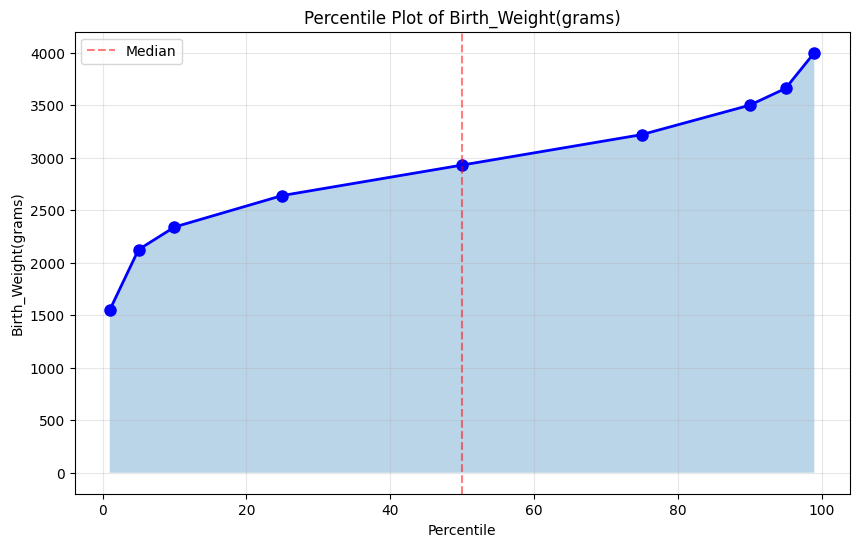

In [35]:

COLUMN = 'Birth_Weight(grams)'  # Change this
data = df[COLUMN].dropna()

# Calculate percentile ranges
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(data, percentiles)

print(f"\n📊 PERCENTILE TABLE for {COLUMN}")
print("="*50)
print(f"{'Percentile':<12} {'Value':>10}")
print("-"*30)
for p, v in zip(percentiles, percentile_values):
    print(f"{p:>3}th percentile: {v:>10.2f}")
print("="*50)

# Create a simple percentile plot
plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_values, 'bo-', linewidth=2, markersize=8)
plt.fill_between(percentiles, percentile_values, alpha=0.3)
plt.xlabel('Percentile')
plt.ylabel(COLUMN)
plt.title(f'Percentile Plot of {COLUMN}')
plt.grid(True, alpha=0.3)
plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='Median')
plt.legend()
plt.savefig(f'{COLUMN}_percentiles.png', dpi=300, bbox_inches='tight')
plt.show()

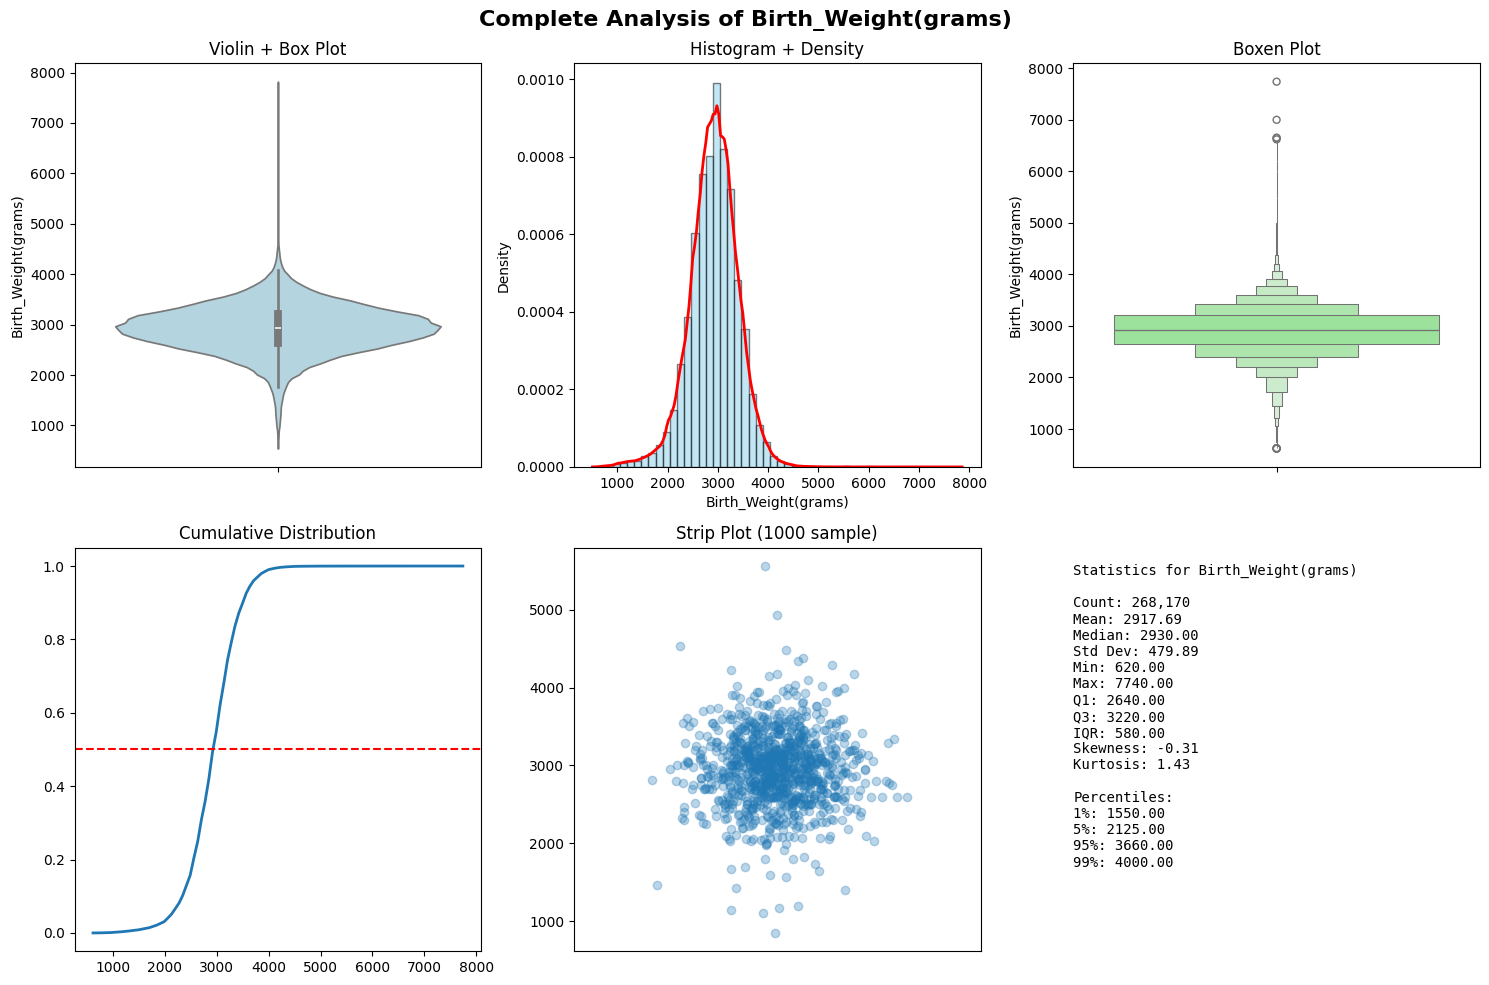

In [36]:

COLUMN = 'Birth_Weight(grams)'  # Change this
data = df[COLUMN].dropna()

fig = plt.figure(figsize=(15, 10))

# 1. Main plot: Violin + Box
ax1 = plt.subplot(2, 3, 1)
sns.violinplot(y=data, ax=ax1, color='lightblue', inner='box')
ax1.set_title('Violin + Box Plot')

# 2. Histogram with KDE
ax2 = plt.subplot(2, 3, 2)
ax2.hist(data, bins=50, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sns.kdeplot(data, ax=ax2, color='red', linewidth=2)
ax2.set_title('Histogram + Density')

# 3. Boxen Plot
ax3 = plt.subplot(2, 3, 3)
sns.boxenplot(y=data, ax=ax3, color='lightgreen')
ax3.set_title('Boxen Plot')

# 4. ECDF
ax4 = plt.subplot(2, 3, 4)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data)
x = np.linspace(data.min(), data.max(), 100)
ax4.plot(x, ecdf(x), linewidth=2)
ax4.axhline(y=0.5, color='red', linestyle='--')
ax4.set_title('Cumulative Distribution')

# 5. Strip Plot (sample)
ax5 = plt.subplot(2, 3, 5)
sample = np.random.choice(data, size=min(1000, len(data)), replace=False)
ax5.plot(np.random.normal(0, 0.1, len(sample)), sample, 'o', alpha=0.3)
ax5.set_xlim([-0.5, 0.5])
ax5.set_xticks([])
ax5.set_title('Strip Plot (1000 sample)')

# 6. Statistics Table
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
stats_text = f"""
Statistics for {COLUMN}

Count: {len(data):,}
Mean: {data.mean():.2f}
Median: {data.median():.2f}
Std Dev: {data.std():.2f}
Min: {data.min():.2f}
Max: {data.max():.2f}
Q1: {data.quantile(0.25):.2f}
Q3: {data.quantile(0.75):.2f}
IQR: {data.quantile(0.75) - data.quantile(0.25):.2f}
Skewness: {data.skew():.2f}
Kurtosis: {data.kurtosis():.2f}

Percentiles:
1%: {np.percentile(data, 1):.2f}
5%: {np.percentile(data, 5):.2f}
95%: {np.percentile(data, 95):.2f}
99%: {np.percentile(data, 99):.2f}
"""
ax6.text(0, 1, stats_text, fontsize=10, verticalalignment='top', family='monospace')

plt.suptitle(f'Complete Analysis of {COLUMN}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{COLUMN}_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


📊 ANALYZING COLUMN: 'Birth_Weight(grams)'

📌 BASIC INFORMATION:
   • Data Type: float64
   • Total Records: 301,712
   • Present Values: 268,170
   • Missing Values: 33,542
   • Missing %: 11.1%
   • Unique Values: 1,853

📊 STATISTICS TABLE:
--------------------------------------------------
Statistic     Value
    Count   268,170
     Mean   2917.69
   Median   2930.00
     Mode   3000.00
  Std Dev    479.89
 Variance 230298.43
  Minimum    620.00
  Maximum   7740.00
    Range   7120.00
 Q1 (25%)   2640.00
 Q3 (75%)   3220.00
      IQR    580.00
 Skewness     -0.31
 Kurtosis      1.43

📈 PERCENTILES:
--------------------------------------------------
Percentile   Value
       1th 1550.00
       5th 2125.00
      10th 2340.00
      25th 2640.00
      50th 2930.00
      75th 3220.00
      90th 3500.00
      95th 3660.00
      99th 4000.00

🔬 NORMALITY TESTS:
--------------------------------------------------
              Test  Statistic  P-Value Normal?
D'Agostino-Pearson 12385.4789 0

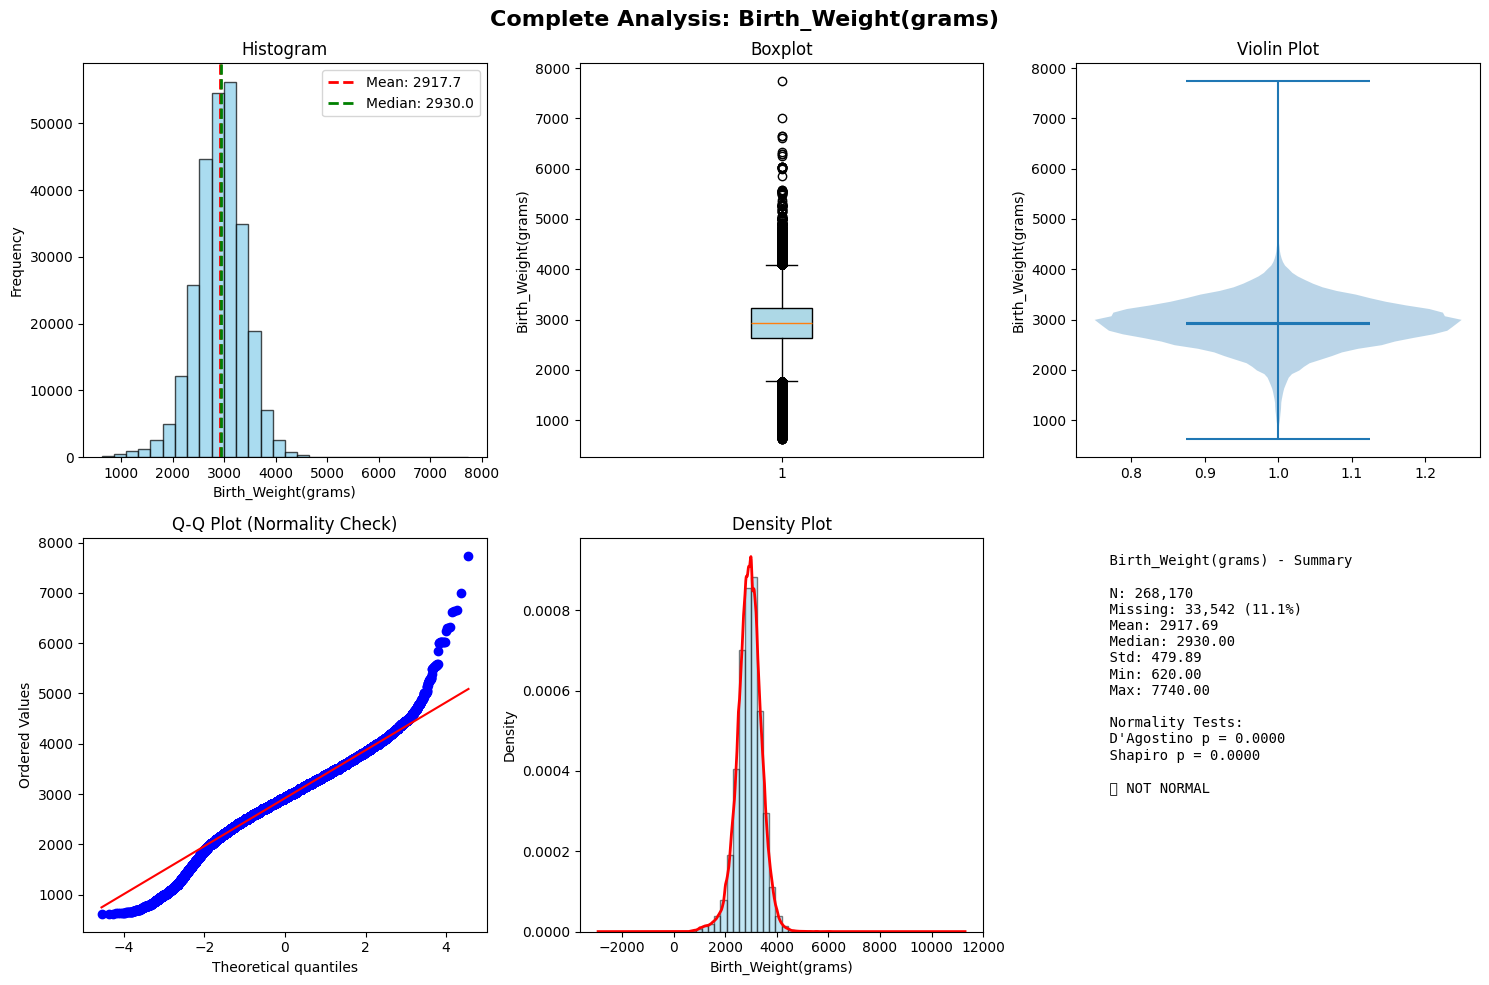

✅ Saved: Birth_Weight(grams)_analysis.png

💾 Saved CSV files:
   • Birth_Weight(grams)_statistics.csv
   • Birth_Weight(grams)_percentiles.csv
   • Birth_Weight(grams)_normality.csv

✅ ANALYSIS COMPLETE for 'Birth_Weight(grams)'


In [40]:

from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# ============================================
# STEP 1: DEFINE YOUR COLUMN NAME HERE (CHANGE THIS ONLY)
# ============================================
COLUMN = 'Birth_Weight(grams)'  # <--- CHANGE THIS ONE LINE to analyze different columns
# ============================================

print(f"\n{'='*60}")
print(f"📊 ANALYZING COLUMN: '{COLUMN}'")
print(f"{'='*60}")

# Check if column exists
if COLUMN not in df.columns:
    print(f"❌ ERROR: Column '{COLUMN}' not found in dataset!")
    print(f"   Available columns: {list(df.columns)[:10]}...")
    exit()

# Get data
data = df[COLUMN].dropna()
data_with_missing = df[COLUMN]

# ============================================
# STEP 2: BASIC INFORMATION
# ============================================
print(f"\n📌 BASIC INFORMATION:")
print(f"   • Data Type: {data_with_missing.dtype}")
print(f"   • Total Records: {len(data_with_missing):,}")
print(f"   • Present Values: {len(data):,}")
print(f"   • Missing Values: {data_with_missing.isnull().sum():,}")
print(f"   • Missing %: {(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%")
print(f"   • Unique Values: {data_with_missing.nunique():,}")

# ============================================
# STEP 3: STATISTICS TABLE (if numeric)
# ============================================
if data.dtype in ['int64', 'float64'] and len(data) > 0:
    print(f"\n📊 STATISTICS TABLE:")
    print("-" * 50)
    
    # Create statistics dataframe
    stats_dict = {
        'Statistic': ['Count', 'Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 
                     'Minimum', 'Maximum', 'Range', 'Q1 (25%)', 'Q3 (75%)', 'IQR',
                     'Skewness', 'Kurtosis'],
        'Value': [
            f"{len(data):,}",
            f"{data.mean():.2f}",
            f"{data.median():.2f}",
            f"{data.mode().iloc[0]:.2f}" if len(data.mode()) > 0 else "N/A",
            f"{data.std():.2f}",
            f"{data.var():.2f}",
            f"{data.min():.2f}",
            f"{data.max():.2f}",
            f"{data.max() - data.min():.2f}",
            f"{data.quantile(0.25):.2f}",
            f"{data.quantile(0.75):.2f}",
            f"{data.quantile(0.75) - data.quantile(0.25):.2f}",
            f"{data.skew():.2f}",
            f"{data.kurtosis():.2f}"
        ]
    }
    
    stats_df = pd.DataFrame(stats_dict)
    print(stats_df.to_string(index=False))
    
    # ============================================
    # STEP 4: PERCENTILES
    # ============================================
    print(f"\n📈 PERCENTILES:")
    print("-" * 50)
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    perc_values = np.percentile(data, percentiles)
    
    perc_df = pd.DataFrame({
        'Percentile': [f"{p}th" for p in percentiles],
        'Value': [f"{v:.2f}" for v in perc_values]
    })
    print(perc_df.to_string(index=False))
    
    # ============================================
    # STEP 5: NORMALITY TESTS
    # ============================================
    print(f"\n🔬 NORMALITY TESTS:")
    print("-" * 50)
    
    # D'Agostino-Pearson Test
    dag_stat, dag_p = stats.normaltest(data)
    
    # Shapiro-Wilk Test (if data size allows)
    if len(data) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(data)
    else:
        shapiro_stat, shapiro_p = stats.shapiro(data.sample(5000))
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    
    # Skewness Test
    skew_stat, skew_p = stats.skewtest(data)
    
    # Kurtosis Test
    kurt_stat, kurt_p = stats.kurtosistest(data)
    
    normality_results = pd.DataFrame({
        'Test': ["D'Agostino-Pearson", "Shapiro-Wilk", "Kolmogorov-Smirnov", "Skewness Test", "Kurtosis Test"],
        'Statistic': [f"{dag_stat:.4f}", f"{shapiro_stat:.4f}", f"{ks_stat:.4f}", f"{skew_stat:.4f}", f"{kurt_stat:.4f}"],
        'P-Value': [f"{dag_p:.6f}", f"{shapiro_p:.6f}", f"{ks_p:.6f}", f"{skew_p:.6f}", f"{kurt_p:.6f}"],
        'Normal?': ['YES' if dag_p > 0.05 else 'NO',
                   'YES' if shapiro_p > 0.05 else 'NO',
                   'YES' if ks_p > 0.05 else 'NO',
                   'YES' if skew_p > 0.05 else 'NO',
                   'YES' if kurt_p > 0.05 else 'NO']
    })
    
    print(normality_results.to_string(index=False))
    
    # Overall conclusion
    p_values = [dag_p, shapiro_p, ks_p, skew_p, kurt_p]
    normal_count = sum([1 for p in p_values if p > 0.05])
    
    print(f"\n📌 NORMALITY CONCLUSION:")
    print(f"   • Tests indicating normal: {normal_count}/5")
    if normal_count >= 3:
        print("   ✅ Data APPROXIMATELY normal - can use parametric tests")
    else:
        print("   ⚠️ Data NOT normal - use non-parametric tests")
    
    # ============================================
    # STEP 6: VISUALIZATIONS
    # ============================================
    print(f"\n🎨 CREATING VISUALIZATIONS...")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 1. Histogram
    axes[0, 0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.1f}')
    axes[0, 0].set_xlabel(COLUMN)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Histogram')
    axes[0, 0].legend()
    
    # 2. Boxplot
    axes[0, 1].boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[0, 1].set_title('Boxplot')
    axes[0, 1].set_ylabel(COLUMN)
    
    # 3. Violin Plot
    axes[0, 2].violinplot(data, showmeans=True, showmedians=True)
    axes[0, 2].set_title('Violin Plot')
    axes[0, 2].set_ylabel(COLUMN)
    
    # 4. Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Normality Check)')
    
    # 5. Density Plot
    axes[1, 1].hist(data, bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
    data.plot.kde(ax=axes[1, 1], color='red', linewidth=2)
    axes[1, 1].set_xlabel(COLUMN)
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].set_title('Density Plot')
    
    # 6. Statistics Text
    axes[1, 2].axis('off')
    stats_text = f"""
    {COLUMN} - Summary
    
    N: {len(data):,}
    Missing: {data_with_missing.isnull().sum():,} ({(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%)
    Mean: {data.mean():.2f}
    Median: {data.median():.2f}
    Std: {data.std():.2f}
    Min: {data.min():.2f}
    Max: {data.max():.2f}
    
    Normality Tests:
    D'Agostino p = {dag_p:.4f}
    Shapiro p = {shapiro_p:.4f}
    
    {'✅ NORMAL' if dag_p > 0.05 else '❌ NOT NORMAL'}
    """
    axes[1, 2].text(0, 1, stats_text, fontsize=10, verticalalignment='top', family='monospace')
    
    plt.suptitle(f'Complete Analysis: {COLUMN}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{COLUMN}_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {COLUMN}_analysis.png")

else:
    # For categorical columns
    print(f"\n📋 CATEGORICAL ANALYSIS:")
    print("-" * 50)
    
    # Frequency table
    freq = data_with_missing.value_counts(dropna=False)
    freq_pct = (data_with_missing.value_counts(dropna=False, normalize=True) * 100).round(1)
    
    cat_df = pd.DataFrame({
        'Category': freq.index,
        'Count': freq.values,
        'Percentage': freq_pct.values
    })
    
    # Replace NaN with "MISSING" for display
    cat_df['Category'] = cat_df['Category'].fillna('MISSING')
    
    print("\n📊 FREQUENCY TABLE:")
    print(cat_df.head(20).to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot (top 15)
    top_cats = cat_df.head(15)
    bars = axes[0].barh(range(len(top_cats)), top_cats['Count'])
    
    # Color "MISSING" bar differently
    for i, cat in enumerate(top_cats['Category']):
        if cat == 'MISSING':
            bars[i].set_color('red')
    
    axes[0].set_yticks(range(len(top_cats)))
    axes[0].set_yticklabels([c[:30] + '...' if len(str(c)) > 30 else c for c in top_cats['Category']])
    axes[0].set_xlabel('Count')
    axes[0].set_title(f'Top Categories - {COLUMN}')
    axes[0].invert_yaxis()
    
    # Pie chart (top 5 + others + missing)
    if len(cat_df) > 5:
        top5 = cat_df.head(5)
        others = pd.DataFrame([{'Category': 'Others', 'Count': cat_df[5:]['Count'].sum(), 'Percentage': cat_df[5:]['Percentage'].sum()}])
        pie_data = pd.concat([top5, others])
    else:
        pie_data = cat_df
    
    axes[1].pie(pie_data['Count'], labels=pie_data['Category'], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Distribution')
    
    plt.suptitle(f'Categorical Analysis: {COLUMN}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{COLUMN}_categorical.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {COLUMN}_categorical.png")

# ============================================
# STEP 7: SAVE RESULTS TO CSV
# ============================================
if data.dtype in ['int64', 'float64'] and len(data) > 0:
    # Save statistics to CSV
    stats_df.to_csv(f'{COLUMN}_statistics.csv', index=False)
    perc_df.to_csv(f'{COLUMN}_percentiles.csv', index=False)
    normality_results.to_csv(f'{COLUMN}_normality.csv', index=False)
    print(f"\n💾 Saved CSV files:")
    print(f"   • {COLUMN}_statistics.csv")
    print(f"   • {COLUMN}_percentiles.csv")
    print(f"   • {COLUMN}_normality.csv")
else:
    cat_df.to_csv(f'{COLUMN}_frequencies.csv', index=False)
    print(f"\n💾 Saved: {COLUMN}_frequencies.csv")

print(f"\n{'='*60}")
print(f"✅ ANALYSIS COMPLETE for '{COLUMN}'")
print(f"{'='*60}")

In [38]:
# List of columns to analyze
COLUMNS = ["mother_age"]  # <-- Add your columns here

for column in COLUMNS:
    if column in df.columns:
        # Run the analysis for each column
        data = df[column].dropna()
        print(f"\n📊 {column}")
        print(f"  Mean: {data.mean():.2f}")
        print(f"  Median: {data.median():.2f}")
        # ... rest of your analysis


📊 ANALYZING COLUMN: 'Birth_Weight(grams)'

📌 BASIC INFORMATION:
   • Data Type: float64
   • Total Records: 301,712
   • Present Values: 268,170
   • Missing Values: 33,542
   • Missing %: 11.1%
   • Unique Values: 1,853

✅ Excel file saved: Birth_Weight(grams)_statistics.xlsx
✅ Excel formatting applied

🎨 Creating visualizations...


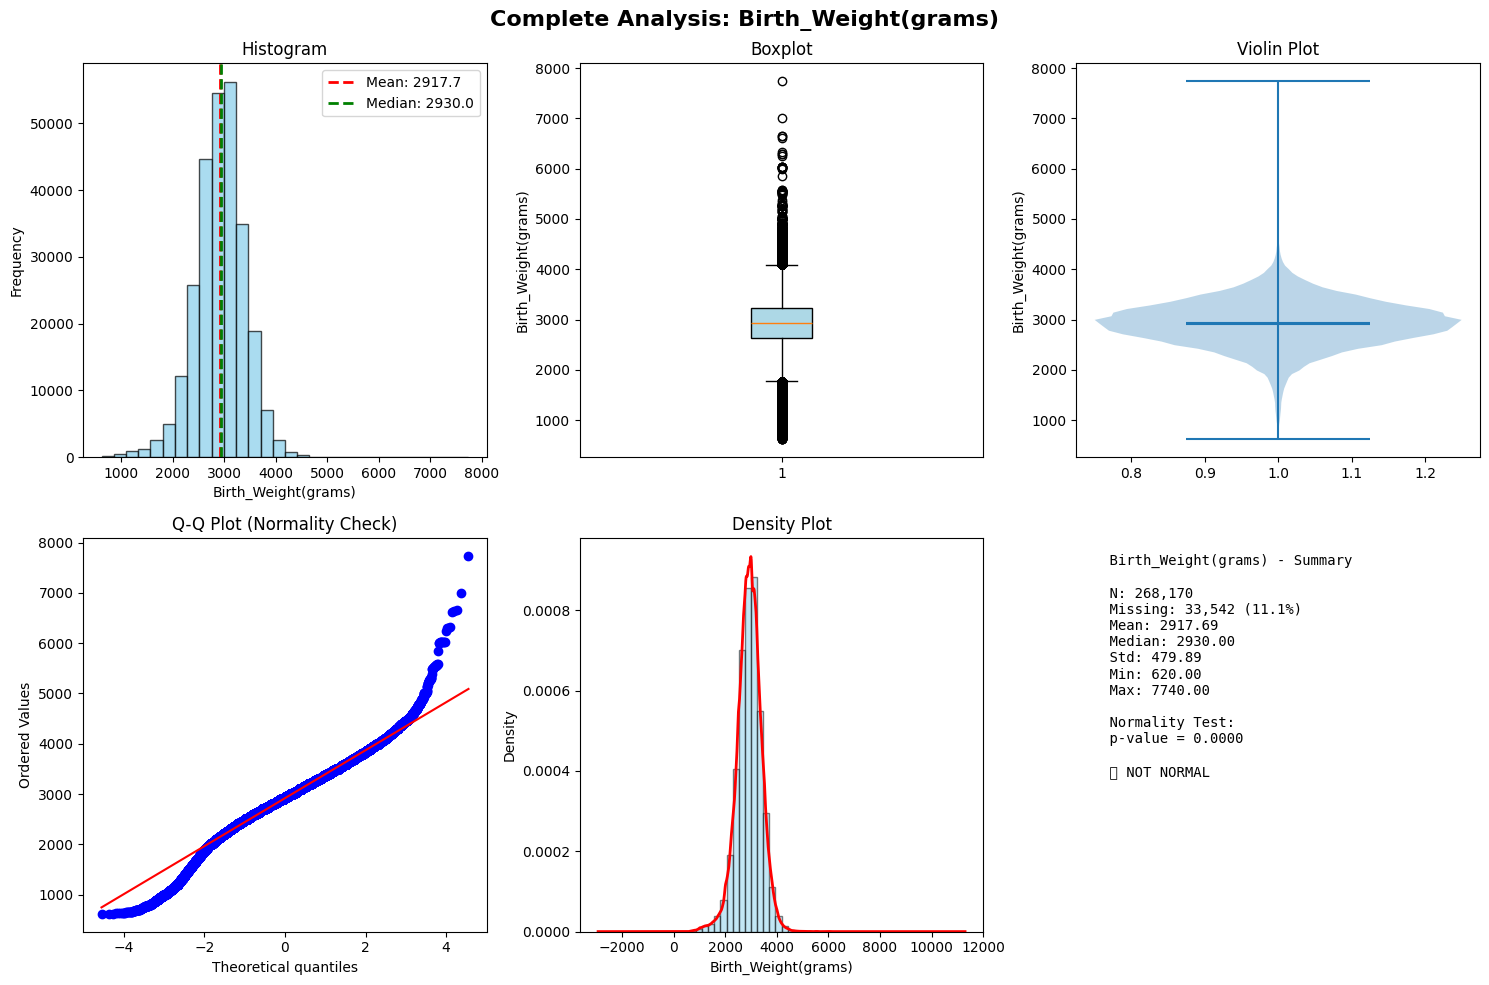

✅ Saved: Birth_Weight(grams)_analysis.png

✅ ANALYSIS COMPLETE for 'Birth_Weight(grams)'
📊 Excel file: Birth_Weight(grams)_statistics.xlsx
📈 PNG file: Birth_Weight(grams)_analysis.png


In [39]:

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from openpyxl import load_workbook
from openpyxl.styles import Font, PatternFill, Alignment, Border, Side



# ============================================
# STEP 1: DEFINE YOUR COLUMN NAME HERE (CHANGE THIS ONLY)
# ============================================
COLUMN = 'Birth_Weight(grams)'  # <--- CHANGE THIS ONE LINE to analyze different columns
# ============================================

print(f"\n{'='*60}")
print(f"📊 ANALYZING COLUMN: '{COLUMN}'")
print(f"{'='*60}")

# Check if column exists
if COLUMN not in df.columns:
    print(f"❌ ERROR: Column '{COLUMN}' not found in dataset!")
    print(f"   Available columns: {list(df.columns)[:10]}...")
    exit()

# Get data
data = df[COLUMN].dropna()
data_with_missing = df[COLUMN]

# ============================================
# STEP 2: BASIC INFORMATION
# ============================================
print(f"\n📌 BASIC INFORMATION:")
print(f"   • Data Type: {data_with_missing.dtype}")
print(f"   • Total Records: {len(data_with_missing):,}")
print(f"   • Present Values: {len(data):,}")
print(f"   • Missing Values: {data_with_missing.isnull().sum():,}")
print(f"   • Missing %: {(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%")
print(f"   • Unique Values: {data_with_missing.nunique():,}")

# Create Excel file
excel_filename = f'{COLUMN}_statistics.xlsx'

with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    
    # ============================================
    # SHEET 1: BASIC INFO
    # ============================================
    basic_info = pd.DataFrame({
        'Metric': ['Column Name', 'Data Type', 'Total Records', 'Present Values', 
                   'Missing Values', 'Missing %', 'Unique Values'],
        'Value': [
            COLUMN,
            str(data_with_missing.dtype),
            f"{len(data_with_missing):,}",
            f"{len(data):,}",
            f"{data_with_missing.isnull().sum():,}",
            f"{(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%",
            f"{data_with_missing.nunique():,}"
        ]
    })
    basic_info.to_excel(writer, sheet_name='Basic_Info', index=False)
    
    if data.dtype in ['int64', 'float64'] and len(data) > 0:
        # ============================================
        # SHEET 2: DESCRIPTIVE STATISTICS
        # ============================================
        stats_dict = {
            'Statistic': ['Count', 'Mean', 'Median', 'Mode', 'Std Deviation', 'Variance', 
                         'Minimum', 'Maximum', 'Range', 'Q1 (25th Percentile)', 
                         'Q2 (50th Percentile - Median)', 'Q3 (75th Percentile)', 
                         'IQR (Interquartile Range)', 'Skewness', 'Kurtosis'],
            'Value': [
                len(data),
                data.mean(),
                data.median(),
                data.mode().iloc[0] if len(data.mode()) > 0 else np.nan,
                data.std(),
                data.var(),
                data.min(),
                data.max(),
                data.max() - data.min(),
                data.quantile(0.25),
                data.quantile(0.50),
                data.quantile(0.75),
                data.quantile(0.75) - data.quantile(0.25),
                data.skew(),
                data.kurtosis()
            ]
        }
        stats_df = pd.DataFrame(stats_dict)
        stats_df.to_excel(writer, sheet_name='Descriptive_Stats', index=False)
        
        # ============================================
        # SHEET 3: PERCENTILES
        # ============================================
        percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
        perc_values = np.percentile(data, percentiles)
        
        perc_df = pd.DataFrame({
            'Percentile': [f"{p}th" for p in percentiles],
            'Value': perc_values
        })
        perc_df.to_excel(writer, sheet_name='Percentiles', index=False)
        
        # ============================================
        # SHEET 4: NORMALITY TESTS
        # ============================================
        # D'Agostino-Pearson Test
        dag_stat, dag_p = stats.normaltest(data)
        
        # Shapiro-Wilk Test (if data size allows)
        if len(data) <= 5000:
            shapiro_stat, shapiro_p = stats.shapiro(data)
        else:
            shapiro_stat, shapiro_p = stats.shapiro(data.sample(5000))
        
        # Kolmogorov-Smirnov Test
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        
        # Skewness Test
        skew_stat, skew_p = stats.skewtest(data)
        
        # Kurtosis Test
        kurt_stat, kurt_p = stats.kurtosistest(data)
        
        # Anderson-Darling Test
        anderson_result = stats.anderson(data)
        
        normality_results = pd.DataFrame({
            'Test': ["D'Agostino-Pearson", "Shapiro-Wilk", "Kolmogorov-Smirnov", 
                    "Skewness Test", "Kurtosis Test", "Anderson-Darling"],
            'Statistic': [dag_stat, shapiro_stat, ks_stat, skew_stat, kurt_stat, anderson_result.statistic],
            'P-Value': [dag_p, shapiro_p, ks_p, skew_p, kurt_p, 'N/A (see critical values)'],
            'Critical Value (5%)': ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', anderson_result.critical_values[2]],
            'Normal Distribution?': [
                'YES' if dag_p > 0.05 else 'NO',
                'YES' if shapiro_p > 0.05 else 'NO',
                'YES' if ks_p > 0.05 else 'NO',
                'YES' if skew_p > 0.05 else 'NO',
                'YES' if kurt_p > 0.05 else 'NO',
                'YES' if anderson_result.statistic < anderson_result.critical_values[2] else 'NO'
            ]
        })
        normality_results.to_excel(writer, sheet_name='Normality_Tests', index=False)
        
        # ============================================
        # SHEET 5: FREQUENCY DISTRIBUTION (Binned)
        # ============================================
        # Create bins for histogram
        n_bins = min(20, len(data) // 100)  # Adaptive bin count
        if n_bins < 5:
            n_bins = 5
            
        hist, bin_edges = np.histogram(data, bins=n_bins)
        
        freq_dist = pd.DataFrame({
            'Bin_Start': bin_edges[:-1],
            'Bin_End': bin_edges[1:],
            'Frequency': hist,
            'Percentage': (hist / len(data) * 100).round(2)
        })
        freq_dist.to_excel(writer, sheet_name='Frequency_Distribution', index=False)
        
        # ============================================
        # SHEET 6: OUTLIER ANALYSIS
        # ============================================
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        outlier_df = pd.DataFrame({
            'Metric': ['Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound', 
                      'Number of Outliers', 'Percentage Outliers',
                      'Minimum Outlier Value', 'Maximum Outlier Value'],
            'Value': [
                Q1, Q3, IQR, lower_bound, upper_bound,
                len(outliers), f"{(len(outliers)/len(data)*100):.2f}%",
                outliers.min() if len(outliers) > 0 else 'N/A',
                outliers.max() if len(outliers) > 0 else 'N/A'
            ]
        })
        outlier_df.to_excel(writer, sheet_name='Outliers', index=False)
        
        # ============================================
        # SHEET 7: SUMMARY TABLE (Compact)
        # ============================================
        summary_dict = {
            'Metric': [
                'Sample Size (n)', 'Missing Values', 'Missing %',
                'Mean', 'Median', 'Standard Deviation',
                'Minimum', 'Maximum', 'Range',
                '25th Percentile', '75th Percentile', 'IQR',
                'Skewness', 'Kurtosis',
                'Normality Test (p-value)', 'Normally Distributed?'
            ],
            'Value': [
                len(data),
                data_with_missing.isnull().sum(),
                f"{(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%",
                f"{data.mean():.2f}",
                f"{data.median():.2f}",
                f"{data.std():.2f}",
                f"{data.min():.2f}",
                f"{data.max():.2f}",
                f"{data.max() - data.min():.2f}",
                f"{data.quantile(0.25):.2f}",
                f"{data.quantile(0.75):.2f}",
                f"{data.quantile(0.75) - data.quantile(0.25):.2f}",
                f"{data.skew():.2f}",
                f"{data.kurtosis():.2f}",
                f"{dag_p:.4f}",
                'YES' if dag_p > 0.05 else 'NO'
            ]
        }
        summary_df = pd.DataFrame(summary_dict)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)
        
    else:
        # For categorical columns
        # ============================================
        # SHEET 2: FREQUENCY TABLE
        # ============================================
        freq = data_with_missing.value_counts(dropna=False)
        freq_pct = (data_with_missing.value_counts(dropna=False, normalize=True) * 100).round(2)
        
        cat_df = pd.DataFrame({
            'Category': freq.index,
            'Count': freq.values,
            'Percentage': freq_pct.values
        })
        cat_df['Category'] = cat_df['Category'].fillna('MISSING')
        cat_df = cat_df.sort_values('Count', ascending=False)
        cat_df.to_excel(writer, sheet_name='Frequency_Table', index=False)
        
        # ============================================
        # SHEET 3: SUMMARY
        # ============================================
        cat_summary = pd.DataFrame({
            'Metric': ['Column Name', 'Data Type', 'Total Records', 'Unique Categories',
                      'Most Frequent Category', 'Most Frequent Count', 'Most Frequent %',
                      'Missing Values', 'Missing %'],
            'Value': [
                COLUMN,
                str(data_with_missing.dtype),
                len(data_with_missing),
                data_with_missing.nunique(),
                cat_df.iloc[0]['Category'] if len(cat_df) > 0 else 'N/A',
                cat_df.iloc[0]['Count'] if len(cat_df) > 0 else 'N/A',
                f"{cat_df.iloc[0]['Percentage']}%" if len(cat_df) > 0 else 'N/A',
                data_with_missing.isnull().sum(),
                f"{(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%"
            ]
        })
        cat_summary.to_excel(writer, sheet_name='Summary', index=False)

print(f"\n✅ Excel file saved: {excel_filename}")

# ============================================
# Apply formatting to Excel
# ============================================
try:
    # Load the workbook to apply formatting
    wb = load_workbook(excel_filename)
    
    # Define styles
    header_font = Font(bold=True, color="FFFFFF")
    header_fill = PatternFill(start_color="2c3e50", end_color="2c3e50", fill_type="solid")
    center_alignment = Alignment(horizontal="center")
    
    # Apply formatting to each sheet
    for sheet_name in wb.sheetnames:
        ws = wb[sheet_name]
        
        # Format headers
        for cell in ws[1]:
            cell.font = header_font
            cell.fill = header_fill
            cell.alignment = center_alignment
        
        # Auto-adjust column widths
        for column in ws.columns:
            max_length = 0
            column_letter = column[0].column_letter
            for cell in column:
                try:
                    if len(str(cell.value)) > max_length:
                        max_length = len(str(cell.value))
                except:
                    pass
            adjusted_width = min(max_length + 2, 50)
            ws.column_dimensions[column_letter].width = adjusted_width
    
    wb.save(excel_filename)
    print(f"✅ Excel formatting applied")
except Exception as e:
    print(f"⚠️ Could not apply formatting: {e}")

# ============================================
# Create visualizations and save as PNG
# ============================================
if data.dtype in ['int64', 'float64'] and len(data) > 0:
    print(f"\n🎨 Creating visualizations...")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 1. Histogram
    axes[0, 0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.1f}')
    axes[0, 0].set_xlabel(COLUMN)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Histogram')
    axes[0, 0].legend()
    
    # 2. Boxplot
    axes[0, 1].boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[0, 1].set_title('Boxplot')
    axes[0, 1].set_ylabel(COLUMN)
    
    # 3. Violin Plot
    axes[0, 2].violinplot(data, showmeans=True, showmedians=True)
    axes[0, 2].set_title('Violin Plot')
    axes[0, 2].set_ylabel(COLUMN)
    
    # 4. Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Normality Check)')
    
    # 5. Density Plot
    axes[1, 1].hist(data, bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
    data.plot.kde(ax=axes[1, 1], color='red', linewidth=2)
    axes[1, 1].set_xlabel(COLUMN)
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].set_title('Density Plot')
    
    # 6. Statistics Text
    axes[1, 2].axis('off')
    _, dag_p = stats.normaltest(data)
    stats_text = f"""
    {COLUMN} - Summary
    
    N: {len(data):,}
    Missing: {data_with_missing.isnull().sum():,} ({(data_with_missing.isnull().sum()/len(data_with_missing)*100):.1f}%)
    Mean: {data.mean():.2f}
    Median: {data.median():.2f}
    Std: {data.std():.2f}
    Min: {data.min():.2f}
    Max: {data.max():.2f}
    
    Normality Test:
    p-value = {dag_p:.4f}
    
    {'✅ NORMAL' if dag_p > 0.05 else '❌ NOT NORMAL'}
    """
    axes[1, 2].text(0, 1, stats_text, fontsize=10, verticalalignment='top', family='monospace')
    
    plt.suptitle(f'Complete Analysis: {COLUMN}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{COLUMN}_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {COLUMN}_analysis.png")

else:
    # For categorical columns
    print(f"\n🎨 Creating visualization...")
    
    freq = data_with_missing.value_counts(dropna=False)
    freq_pct = (data_with_missing.value_counts(dropna=False, normalize=True) * 100).round(1)
    
    cat_df = pd.DataFrame({
        'Category': freq.index,
        'Count': freq.values,
        'Percentage': freq_pct.values
    })
    cat_df['Category'] = cat_df['Category'].fillna('MISSING')
    cat_df = cat_df.head(20)  # Top 20
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot
    bars = axes[0].barh(range(len(cat_df)), cat_df['Count'])
    for i, cat in enumerate(cat_df['Category']):
        if cat == 'MISSING':
            bars[i].set_color('red')
    
    axes[0].set_yticks(range(len(cat_df)))
    axes[0].set_yticklabels([c[:30] + '...' if len(str(c)) > 30 else c for c in cat_df['Category']])
    axes[0].set_xlabel('Count')
    axes[0].set_title(f'Top Categories - {COLUMN}')
    axes[0].invert_yaxis()
    
    # Pie chart
    if len(cat_df) > 5:
        pie_data = pd.concat([cat_df.head(5), pd.DataFrame([{'Category': 'Others', 'Count': cat_df[5:]['Count'].sum()}])])
    else:
        pie_data = cat_df
    
    axes[1].pie(pie_data['Count'], labels=pie_data['Category'], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Distribution')
    
    plt.suptitle(f'Categorical Analysis: {COLUMN}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{COLUMN}_categorical.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {COLUMN}_categorical.png")

print(f"\n{'='*60}")
print(f"✅ ANALYSIS COMPLETE for '{COLUMN}'")
print(f"📊 Excel file: {excel_filename}")
print(f"📈 PNG file: {COLUMN}_analysis.png")
print(f"{'='*60}")